In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import pandas as pd
import config
import seaborn as sns
with open('config.py') as key:
    api_key=key.read().strip()

resp = requests.get(f'https://api.census.gov/data/2018/abscbo?get=GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,OWNER_SEX,OWNER_SEX_LABEL,OWNER_ETH,OWNER_ETH_LABEL,OWNER_RACE,OWNER_RACE_LABEL,OWNPDEMP,OWNPDEMP_F,OWNPDEMP_PCT,OWNPDEMP_PCT_F&for=us:*&QDESC_LABEL=YRACQBUS&key={api_key}')
print(resp.text)

[["GEO_ID","NAME","NAICS2017","NAICS2017_LABEL","OWNER_SEX","OWNER_SEX_LABEL","OWNER_ETH","OWNER_ETH_LABEL","OWNER_RACE","OWNER_RACE_LABEL","OWNPDEMP","OWNPDEMP_F","OWNPDEMP_PCT","OWNPDEMP_PCT_F","QDESC_LABEL","us"],
["0100000US","United States","00","Total for all sectors","002","Female","001","All owners of respondent firms","40","Black or African American","248",null,"0.9",null,"YRACQBUS","1"],
["0100000US","United States","00","Total for all sectors","003","Male","001","All owners of respondent firms","40","Black or African American","977",null,"2.2",null,"YRACQBUS","1"],
["0100000US","United States","00","Total for all sectors","001","All owners of respondent firms","001","All owners of respondent firms","50","American Indian and Alaska Native","372",null,"2.0",null,"YRACQBUS","1"],
["0100000US","United States","00","Total for all sectors","001","All owners of respondent firms","001","All owners of respondent firms","00","All owners of respondent firms","146045",null,"3.6",null,"Y

In [11]:
data=resp.json()
df=pd.DataFrame(data[1:],columns=data[0]).\
    rename(columns={'NAME':'Country','NAICS2017_LABEL':'Employer Firm Sector','OWNER_SEX_LABEL':'Sex','OWNER_ETH_LABEL':'Ethnicity','OWNER_RACE_LABEL':'Race','OWNPDEMP':'Number of Owners','OWNPDEMP_PCT':'Percent of Owners'})
df.drop(columns=['GEO_ID','NAICS2017','OWNER_SEX','OWNER_ETH','OWNER_RACE','OWNPDEMP_F','OWNPDEMP_PCT_F','QDESC_LABEL','us'],inplace=True)
df=df.astype(dtype={'Number of Owners':'int64', 'Percent of Owners':'float'})
df


,Country,Employer Firm Sector,Sex,Ethnicity,Race,Number of Owners,Percent of Owners
0,United States,Total for all sectors,Female,All owners of respondent firms,Black or African American,248,0.9
1,United States,Total for all sectors,Male,All owners of respondent firms,Black or African American,977,2.2
2,United States,Total for all sectors,All owners of respondent firms,All owners of respondent firms,American Indian and Alaska Native,372,2.0
3,United States,Total for all sectors,All owners of respondent firms,All owners of respondent firms,All owners of respondent firms,146045,3.6
4,United States,Total for all sectors,Female,All owners of respondent firms,All owners of respondent firms,33689,2.7
...,...,...,...,...,...,...,...
468,United States,Industries not classified,All owners of respondent firms,Non-Hispanic,All owners of respondent firms,2576,25.8
469,United States,Industries not classified,Female,Non-Hispanic,All owners of respondent firms,909,23.9
470,United States,Industries not classified,Male,Non-Hispanic,All owners of respondent firms,1665,26.9
471,United States,Industries not classified,All owners of respondent firms,All owners of respondent firms,White,2587,26.1


In [12]:
#1st graph
total_units = df.groupby(['Sex'])['Number of Owners'].sum()
total_units = total_units.drop(['All owners of respondent firms'], axis=0)
#2nd graph
total_2s= df.groupby(['Employer Firm Sector'])['Number of Owners'].sum()
total_2s = total_2s.drop(['Total for all sectors'],axis=0)
total_2s = total_2s.sort_values(ascending=False)  
total_2s = total_2s.head(10)
#3rd graph


total_t = df.groupby(['Sex','Employer Firm Sector'])['Number of Owners'].sum()
total_t = total_t.drop(['All owners of respondent firms'],axis=0)
total_t_sorted = total_t.sort_values(ascending=False)
total_t_10 = total_t_sorted[2:12]


(array([0, 1]), [Text(0, 0, 'Female'), Text(1, 0, 'Male')])

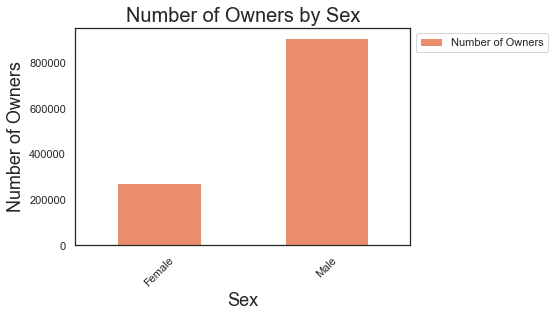

In [13]:

sns.set_theme(style="white", palette='flare')
ax = total_units.plot(y='Number of Owners', kind='bar')
plt.legend(bbox_to_anchor=(1,1), 
           loc="upper left"
          )
ax.set_xlabel('Sex', fontsize=18)
ax.set_ylabel('Number of Owners', fontsize=18)
ax.set_title('Number of Owners by Sex',fontsize=20)
plt.xticks(rotation=45)

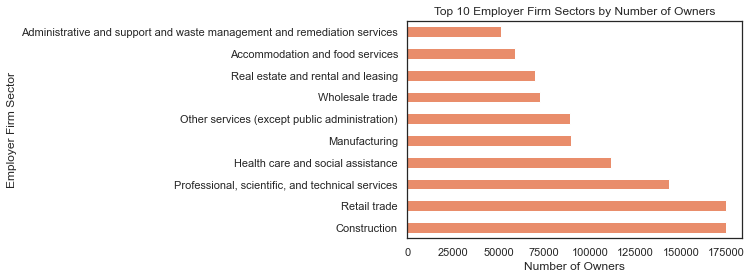

In [173]:
# sns.set_theme(style="white")
# plt.figure(figsize = (15,8))
# ax = sns.barplot(x='Number of Owners', y='Employer Firm Sector', 
#                  data=total_2s, 
#                  color='green', 
#                  orient='h'
#                 )
# ax.set_xlabel('Number of Owners', size=18)
# ax.set_ylabel('Employer Firm Sector', size=18)
# ax.set_title('Number of Owners by Employer Firm Sector',fontsize=20)



ax = total_2s.plot(title='Top 10 Employer Firm Sectors by Number of Owners',kind='barh',x='Number of Owners')
ax.set_xlabel('Number of Owners')
ax.set_ylabel('Employer Firm Sector')

plt.show()


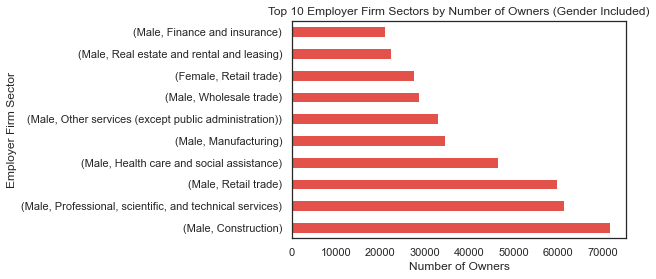

In [202]:
sns.set_theme(style='white',palette='Spectral')
ax = total_t_10.plot(title='Top 10 Employer Firm Sectors by Number of Owners (Gender Included)',kind='barh',x='Number of Owners')
ax.set_xlabel('Number of Owners')
ax.set_ylabel('Employer Firm Sector')

plt.show()

In [176]:
total_3s = df.groupby(['Race'])['Number of Owners'].sum()
total_3s = total_3s.drop(['All owners of respondent firms','Minority','Nonminority'], axis=0)
total_3s

Race
American Indian and Alaska Native               1048
Asian                                          17587
Black or African American                       4624
Native Hawaiian and Other Pacific Islander       212
White                                         565897
Name: Number of Owners, dtype: int64

([<matplotlib.patches.Wedge at 0x2d270a07040>,
 [Text(1.0914022267716987, 0.13726317568007027, 'All Other Races'),
  Text(-1.0914022235588219, -0.1372632012261827, 'White')],
 [Text(0.5953103055118356, 0.07487082309822014, '4.0%'),
  Text(-0.5953103037593573, -0.07487083703246329, '96.0%')])

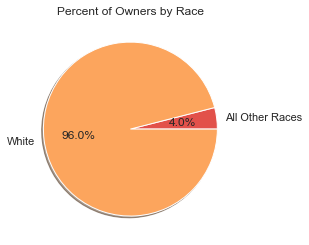

In [217]:
fig, axs = plt.subplots()
labels = 'All Other Races', 'White'
fracs = [23471, 565897]
# A standard pie plot
plt.title('Percent of Owners by Race')
axs.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)


([<matplotlib.patches.Wedge at 0x2d270abd040>,
 [Text(1.0891953786362953, 0.15379670723828098, 'American Indian and Alaska Native'),
  Text(-0.9616129270947233, 0.5341353559204993, 'Asian'),
  Text(0.8583135927794922, -0.6879664064836017, 'Black or African American'),
  Text(1.0995571596643832, -0.031209816256973697, 'Native Hawaiian and Other Pacific Islander')],
 [Text(0.5941065701652519, 0.08388911303906234, '4.5%'),
  Text(-0.5245161420516672, 0.29134655777481777, '74.9%'),
  Text(0.46817105060699565, -0.37525440353651, '19.7%'),
  Text(0.5997584507260272, -0.01702353614016747, '0.9%')])

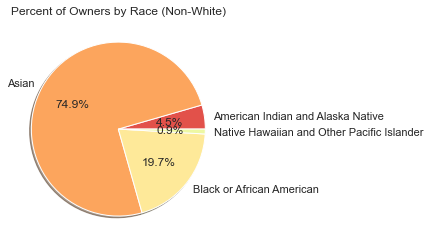

In [219]:
fig, axs = plt.subplots()
labels = 'American Indian and Alaska Native', 'Asian', 'Black or African American', 'Native Hawaiian and Other Pacific Islander'
fracs = [1048, 17587, 4624, 212]
plt.title('Percent of Owners by Race (Non-White)')
axs.pie(fracs, labels=labels, autopct='%1.1f%%', shadow=True)